## Assignment 1 - Classification


Student: Jing Wang, userid:wjng@uwaterloo.ca

## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [2]:
### Your code here

## Feel free to use multiple cells  and continue from here:


import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.simplefilter("ignore")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

df = pd.read_excel(r'C:\Users\jacey\Documents\Machine Learning Data Science\assignment-1.html\media\documents\default of credit card clients.xls', sheet_name = 'Data', skiprows= 1, header = 0,index_col='ID')


df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data=df.copy()

In [4]:
data.shape

(30000, 24)

In [5]:
data.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
data['AGE'].value_counts()
#Age column has too many datapoints, will need to group it

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

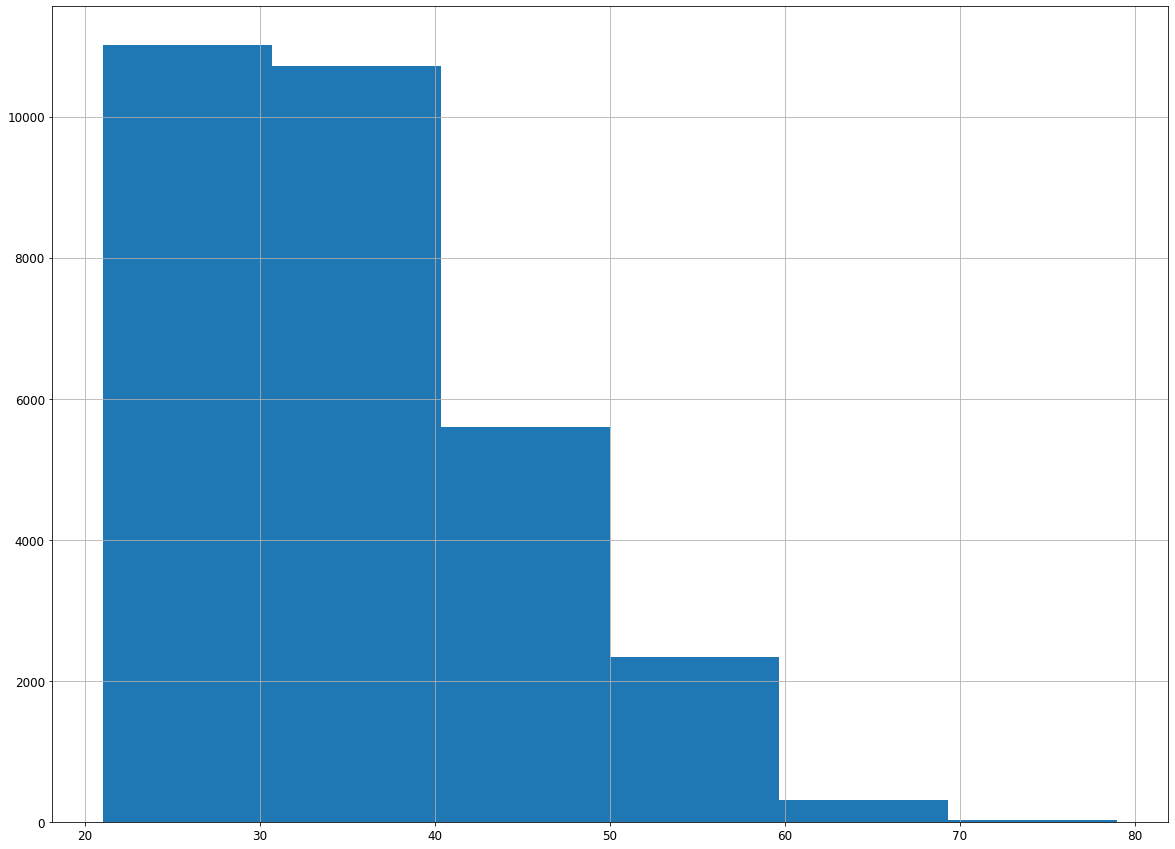

In [8]:
data['AGE'].hist(bins=6, figsize=(20,15))
plt.show()

In [9]:
bins= [20,30,40,50,60,70,80]
#labels = list(range(6))
data['AGE'] = pd.cut(data['AGE'], bins=bins, labels=list(range(6)), right=False)
data['AGE'].value_counts()

1    11238
0     9618
2     6464
3     2341
4      314
5       25
Name: AGE, dtype: int64

In [10]:
##Check missing value for all columns
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
target=['default payment next month']
discrete_vars=['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
continuous_vars=['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

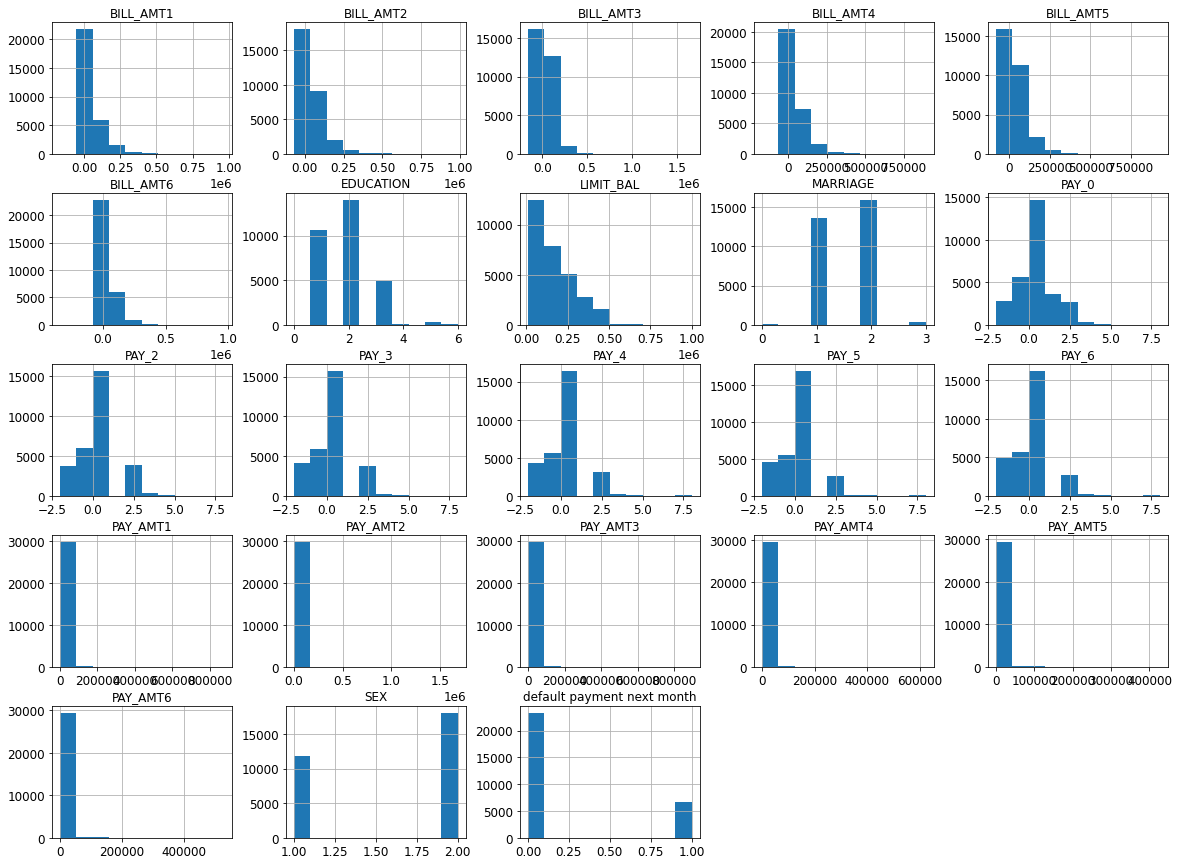

In [13]:
data.hist(figsize=(20,15))
plt.show()

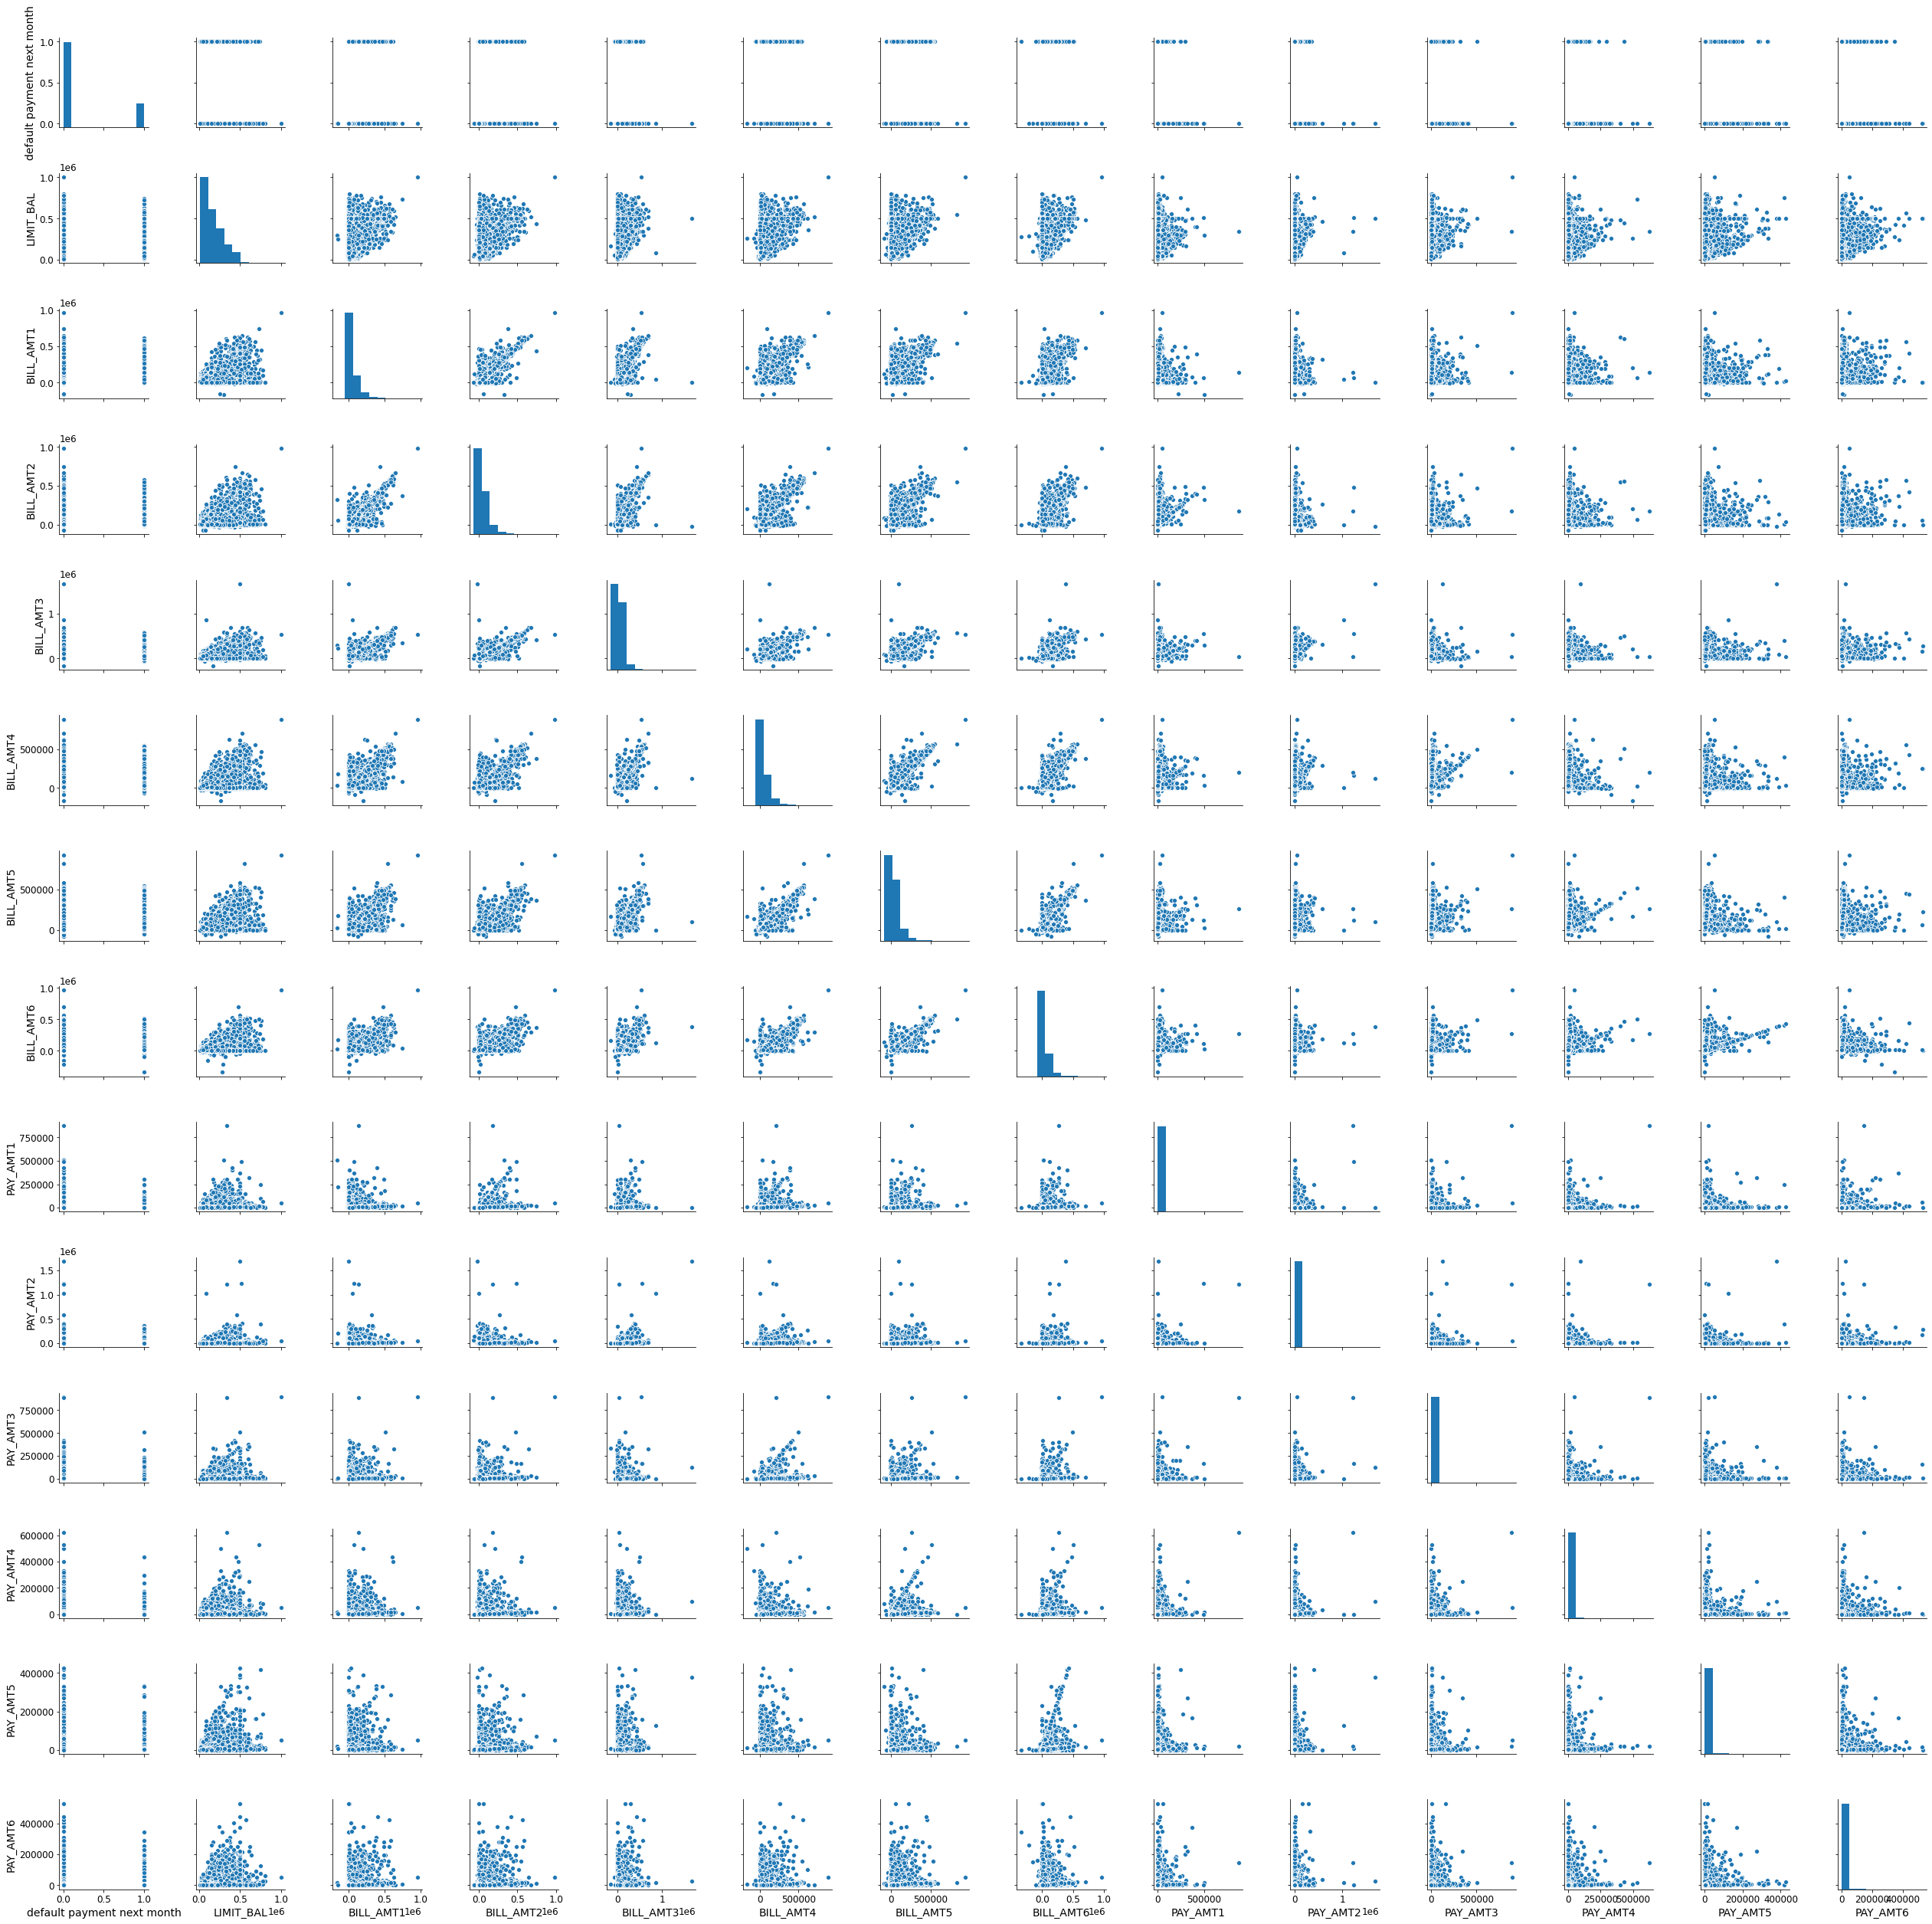

<Figure size 1440x2160 with 0 Axes>

In [14]:
sns.pairplot(data=data.loc[:, ['default payment next month'] + continuous_vars])
plt.figure(figsize=(20,30))
plt.show()

<Figure size 1440x2160 with 0 Axes>

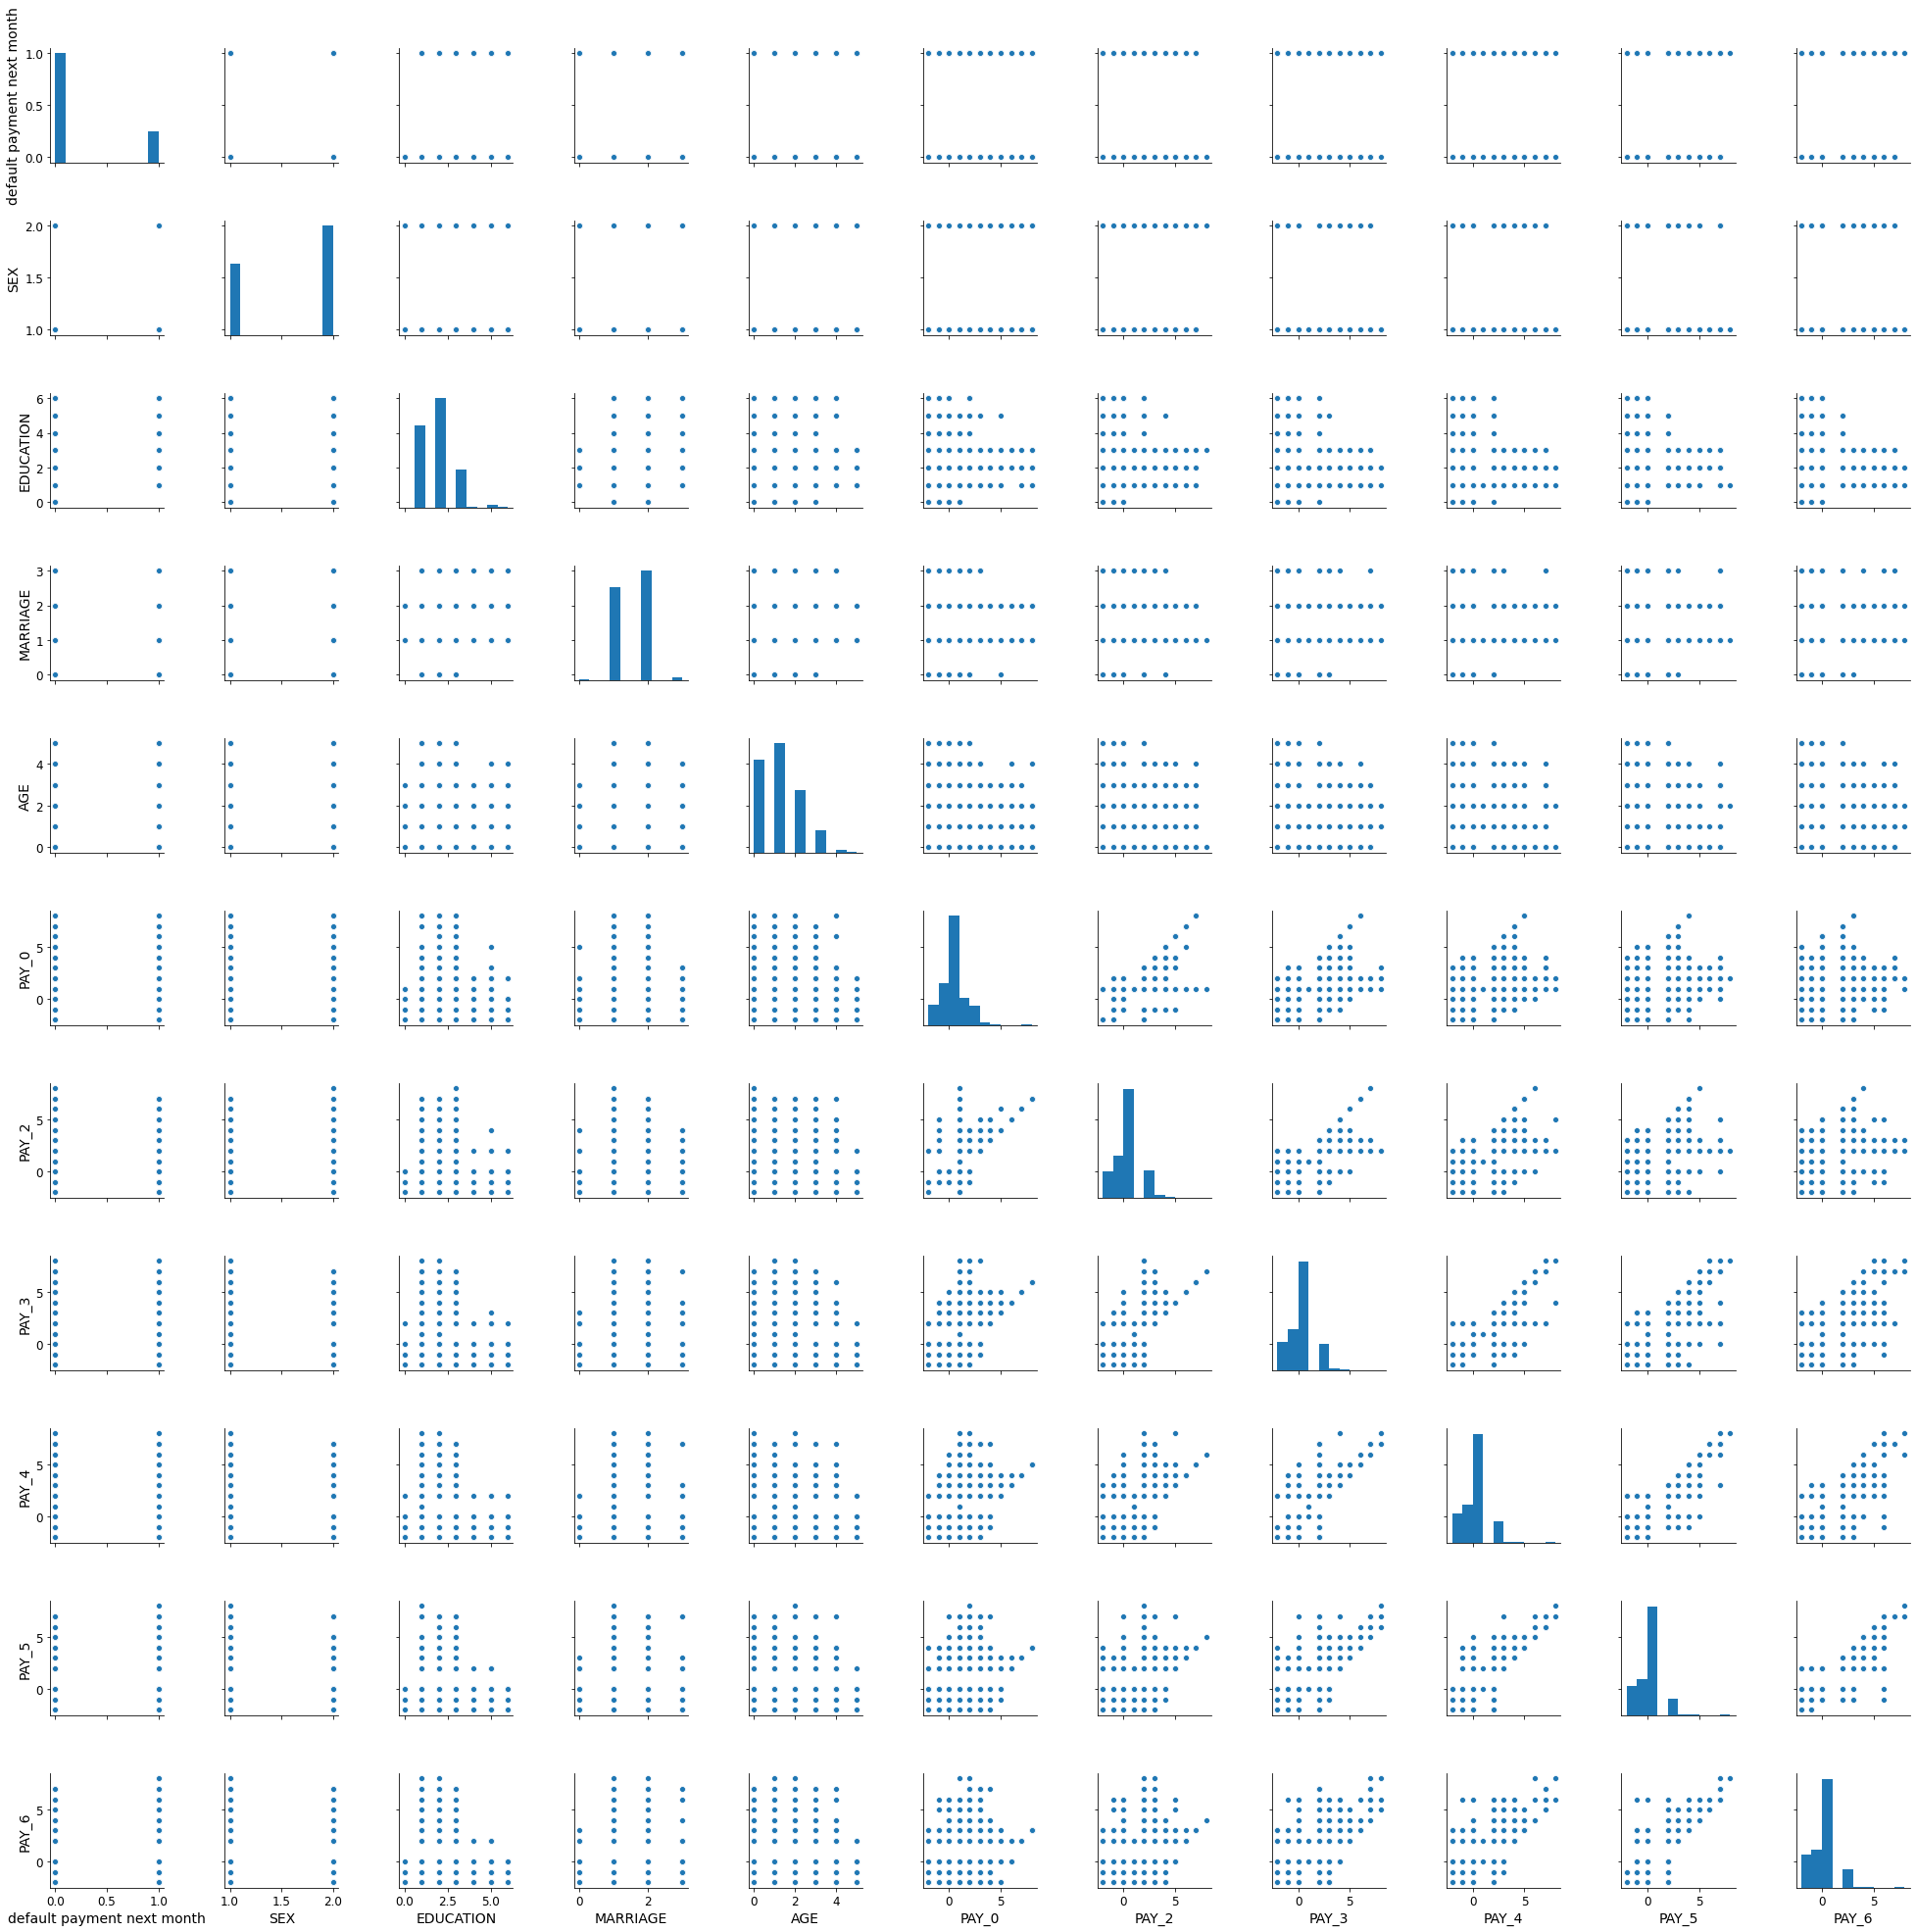

In [15]:
plt.figure(figsize=(20,30))
sns.pairplot(data=data.loc[:, ['default payment next month'] + discrete_vars])
plt.show()

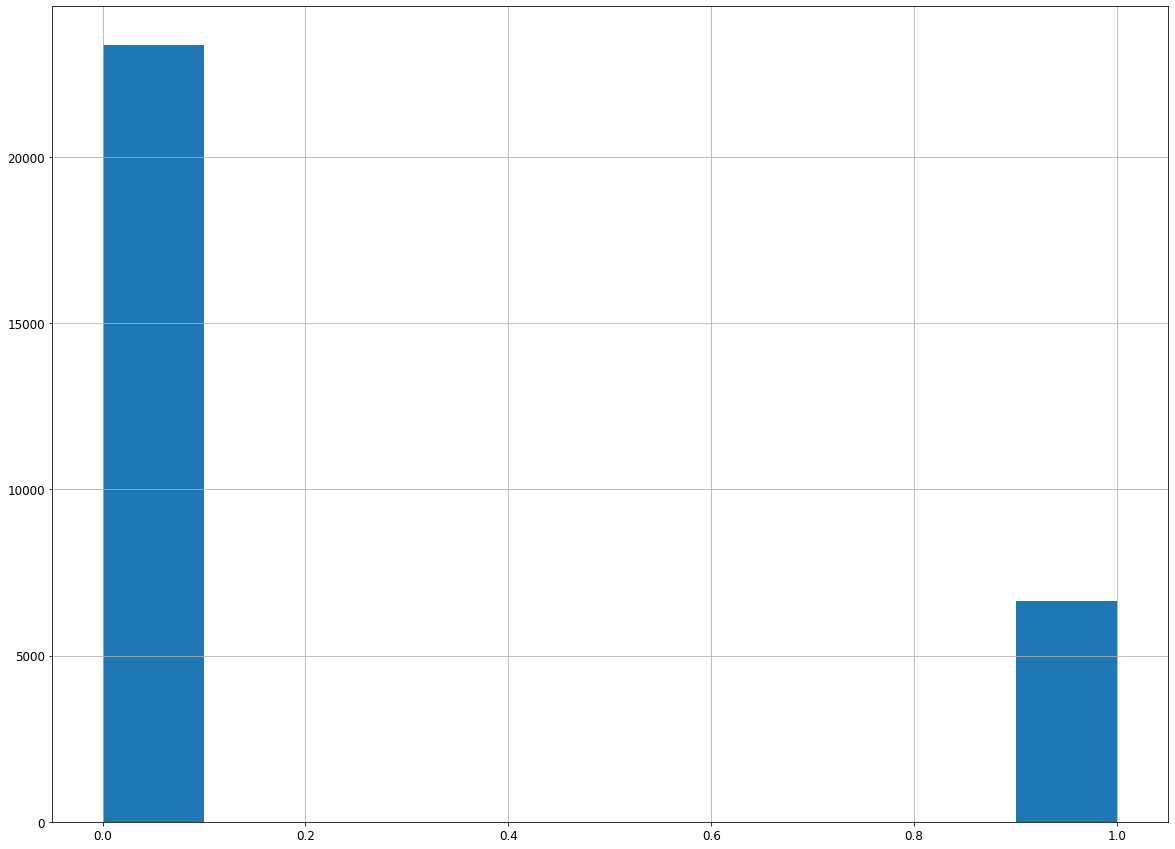

In [16]:
data['default payment next month'].hist( figsize=(20,15))
plt.show()
#majority of people pay their credit card

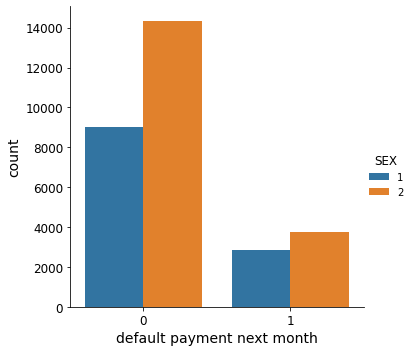

In [17]:
sns.catplot(x="default payment next month",kind="count",hue="SEX",data=data)
#female is more likely to pay their credit card

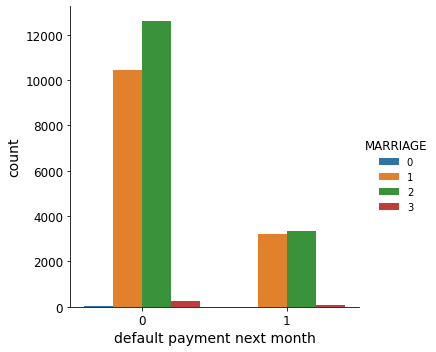

In [18]:
sns.catplot(x="default payment next month",kind="count",hue="MARRIAGE",data=data)
#single person is more likely to pay their credit card

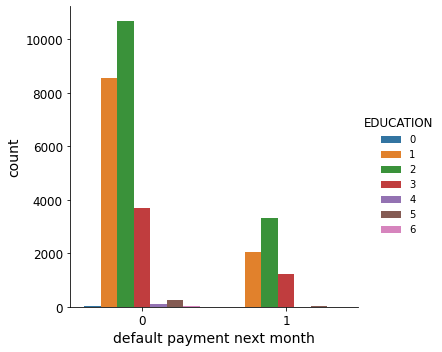

In [19]:
sns.catplot(x="default payment next month",kind="count",hue="EDUCATION",data=data)  ##,col="SEX"
#education with high school people more likely to pay their credit card

In [20]:
corr_matrix = data.corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment next month, dtype: float64

As see above, the customer paid in first few payments are quite important to decide if customer will be default credit. It is quite making sense, if they are capable to pay first payment, they will be committed to pay rest of months most likely. 

Marriage and Sex have weak negative correlation with Defaulty payment, it align with what we see in pervious chart, single person is more likely to pay the credit card, female is more likely to pay the credit card than female


Bill_Amt and Pay_Amt has very week negative correlation with Default Payment.



In [21]:
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

In [22]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,1,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,3,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,1,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,2,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,1,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 23) (6000, 23) (24000,) (6000,)


In [24]:
y_train.value_counts()/len(y_train)

0    0.777833
1    0.222167
Name: default payment next month, dtype: float64

In [25]:
y_test.value_counts()/len(y_test)

0    0.782667
1    0.217333
Name: default payment next month, dtype: float64

The split of test and train data is quite even(of default and non-default)

In [26]:
##Random Forest cv=5
model_rf = RandomForestRegressor(max_depth=2, random_state=123)
pipe1 = Pipeline(steps=[('scaler', StandardScaler()), ('rf', model_rf)])
scores1 = cross_val_score(pipe1,X, y, cv=5, scoring='roc_auc')  
scores1

array([0.68489272, 0.68651303, 0.73262085, 0.74785136, 0.71115718])

In [27]:
roc_auc_rf1 = np.mean(scores1)
roc_auc_rf1 

0.7126070270963478

In [28]:
##KNN cv=5
model_kn = knnc()
pipe2 = Pipeline(steps=[('scaler', StandardScaler()), ('rf', model_kn)])
scores2 = cross_val_score(pipe2, X, y, cv=5, scoring='roc_auc') 
scores2


array([0.67941262, 0.6913875 , 0.71000356, 0.71231349, 0.70718824])

In [29]:
roc_auc_rf2 = np.mean(scores2)
roc_auc_rf2

0.7000610818615798

Analysis:compare Random Forest ROC with KNN ROC, Random forest give the best accuracy.

In [30]:
# Create parameter grid  
param_grid_rf = {
    'max_depth': [2,5,10],
    'n_estimators': [4,5,10,20,50]
}

# Instantiate the model
model_rf2 = RandomForestClassifier(random_state=123)

# Instantiate grid search model
grid_search_rf = GridSearchCV(estimator = model_rf2, param_grid = param_grid_rf,    
                          cv = 5)

# Fit grid search to the data
grid_search_rf.fit(X_train, y_train)

print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

0.818
{'max_depth': 10, 'n_estimators': 50}
RandomForestClassifier(max_depth=10, n_estimators=50, random_state=123)


In [31]:
#based on above, best parameters {'max_depth': 10, 'n_estimators': 50}
#RandomForestClassifier(max_depth=10, n_estimators=50, random_state=123)
best_rf=RandomForestClassifier(max_depth=10, n_estimators=50, random_state=123)
best_rf.fit(X_train,y_train)
score_best_rf=cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
roc_auc_best_rf=np.mean(score_best_rf)
print(f'ROC_AUC training score after tuning for Random Forest: {roc_auc_best_rf:.3f}')

ROC_AUC training score after tuning for Random Forest: 0.775


In [32]:
best_rf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
best_rf_accuracy = best_rf.score(X_test, y_test)

print('Accuracy: %.2f%%' % (best_rf_accuracy*100.0))

Accuracy: 81.93%


In [34]:
param_grid_kn = {'n_neighbors': [3, 5, 10, 20]}
knn = knnc()

grid_search_kn = GridSearchCV(knn, param_grid=param_grid_kn, cv=5, scoring= 'roc_auc')
grid_search_kn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20]}, scoring='roc_auc')

In [35]:

print(grid_search_kn.best_score_)
print(grid_search_kn.best_params_)
print(grid_search_kn.best_estimator_)



0.6437043581661077
{'n_neighbors': 20}
KNeighborsClassifier(n_neighbors=20)


In [36]:
#best model 0.6437043581661077
#{'n_neighbors': 20}
#KNeighborsClassifier(n_neighbors=20)
best_kn = knnc(n_neighbors=20)
best_kn.fit(X_train, y_train)


score_best_kn=cross_val_score(best_kn, X_train, y_train, cv=5, scoring='roc_auc')
roc_auc_best_kn=np.mean(score_best_kn)

print(f'ROC_AUC training score after tuning for KNN: {roc_auc_best_kn:.3f}')




ROC_AUC training score after tuning for KNN: 0.644


In [37]:
# make a prediction on test data
best_kn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
best_kn_accuracy = best_kn.score(X_test, y_test)

print('Accuracy: %.2f%%' % (best_kn_accuracy*100.0))

Accuracy: 78.52%


by look at the ROC_AUC and accuracy, Random Forest is better than KNN

In [39]:
## plot the ROC metrics and Confusion Matrix in one graph for two models

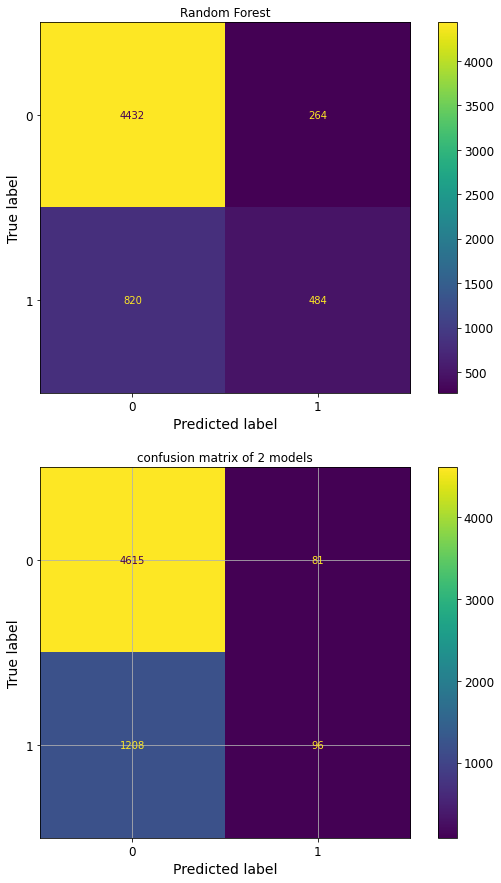

In [40]:

# Plot confusion matrix of 2 models

fig,ax=plt.subplots(2,1, figsize=(10,15))

plot_confusion_matrix(best_rf, X_test, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Random Forest")

plot_confusion_matrix(best_kn, X_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("KNN")
plt.title('confusion matrix of 2 models')
plt.grid()


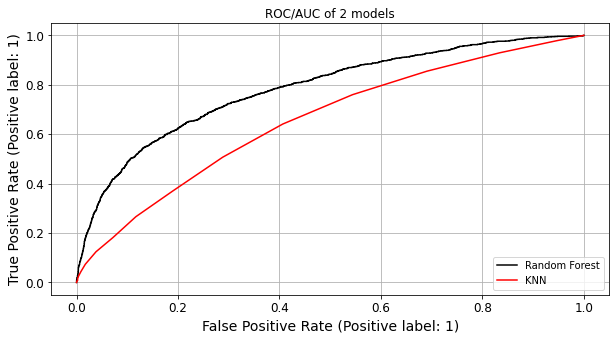

In [41]:
# Plot ROC_AUC curve of 2 models



fig,ax=plt.subplots(figsize=(10,5))
plot_roc_curve(best_rf, X_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(best_kn, X_test, y_test,ax=ax, color="red",label='KNN')

plt.title('ROC/AUC of 2 models')
plt.grid()

#### Conclusions

Explain your results and choices:
Conclusions: Random Forest is closer to 1, the best model is Random Forest